In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time
from matplotlib import colors

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
# from pyMFI import MFI
from pyMFI import MFI1D
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

The path is: /home/ucecabj/Desktop/pyMFI_git


In [14]:
a = np.arange(1,11).tolist()

print(a)

a = a.remove(9)

print(a)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
None


In [10]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n55/"

a = MFI.load_npy(path + "/backward_master_1_n55")

print(np.shape(a))

#initialise force list and grid
forceterms_forw = []
forceterms_back = []
min_grid=0; max_grid=275; nbins=2201; X = np.linspace(min_grid, max_grid, nbins)

#load force terms
for i in range(1,51):
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n55")
    forceterms_forw.append( [Ftot_den, Ftot] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n55")
    forceterms_back.append( [Ftot_den, Ftot] )
    
#Boostrap
[FES_avr, sd_fes, sd_fes_prog ] = MFI1D.bootstrap_forw_back(X, np.asarray(forceterms_forw), np.asarray(forceterms_back), n_bootstrap=10, set_fes_minima="first_value")
    
#Plot
plt.figure(figsize=(14,5)); plt.subplot(1,2,1)
plt.plot(X, FES_avr, label="avr. FES")
plt.fill_between(X, FES_avr - sd_fes, FES_avr + sd_fes, alpha=0.3, color="red", label="st. dev")
plt.xlabel("Number of particles in liquid phase"), plt.ylabel("Free Energy [kJ/mol]"); plt.legend(); plt.title("Free Enery Surface with Standard Deviation")


plt.subplot(1,2,2)
plt.plot(range(len(sd_fes_prog)), sd_fes_prog)
plt.xlabel("Bootstrap itterations"), plt.ylabel("St. dev [kJ/mol]"); plt.title("Progression of Standard Deviation by Bootstrap Itteration"); plt.tight_layout()

(5, 2201)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n55/forward_master_9_n55'

Itteration: 50 - sd: 0.61884
Itteration: 100 - sd: 0.64196
Itteration: 150 - sd: 0.60373
Itteration: 200 - sd: 0.64605
Itteration: 250 - sd: 0.66055
Itteration: 300 - sd: 0.65638
Itteration: 350 - sd: 0.65357
Itteration: 400 - sd: 0.64925
Itteration: 450 - sd: 0.64675
Itteration: 500 - sd: 0.63753


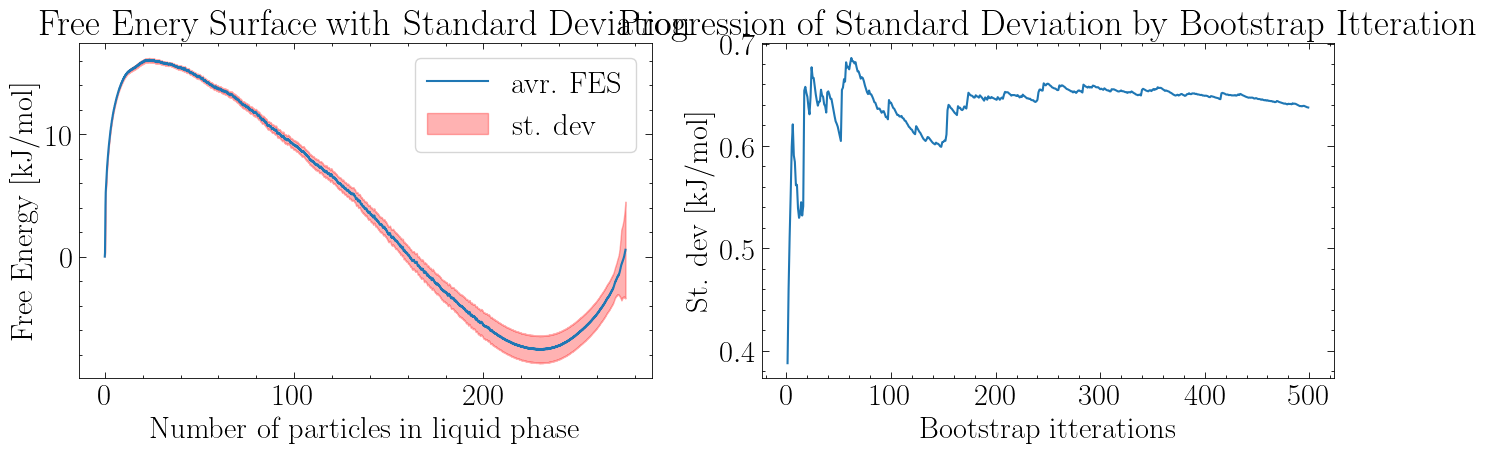

In [7]:
# os.chdir(path + "/DATA_examples/1D_LJ_T6n55")

path_forceterms = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/1D_LJ_T6n55/force_terms/"

#initialise force list and grid
forceterms_forw = []
forceterms_back = []
min_grid=0; max_grid=275; nbins=2201; X = np.linspace(min_grid, max_grid, nbins)

#load force terms
for i in range(1,51):
    [Ftot_den, Ftot_den2, Ftot, ofv_num] = MFI1D.load_pkl(path_forceterms + "forces_forw_"+str(i))
    forceterms_forw.append( [Ftot_den, Ftot] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num] = MFI1D.load_pkl(path_forceterms + "forces_back_"+str(i))
    forceterms_back.append( [Ftot_den, Ftot] )
    
#Boostrap
[FES_avr, sd_fes, sd_fes_prog ] = MFI1D.bootstrap_forw_back(X, np.asarray(forceterms_forw), np.asarray(forceterms_back), n_bootstrap=500, set_fes_minima="first_value")
    
#Plot
plt.figure(figsize=(14,5)); plt.subplot(1,2,1)
plt.plot(X, FES_avr, label="avr. FES")
plt.fill_between(X, FES_avr - sd_fes, FES_avr + sd_fes, alpha=0.3, color="red", label="st. dev")
plt.xlabel("Number of particles in liquid phase"), plt.ylabel("Free Energy [kJ/mol]"); plt.legend(); plt.title("Free Enery Surface with Standard Deviation")


plt.subplot(1,2,2)
plt.plot(range(len(sd_fes_prog)), sd_fes_prog)
plt.xlabel("Bootstrap itterations"), plt.ylabel("St. dev [kJ/mol]"); plt.title("Progression of Standard Deviation by Bootstrap Itteration"); plt.tight_layout()

NameError: name 'X' is not defined

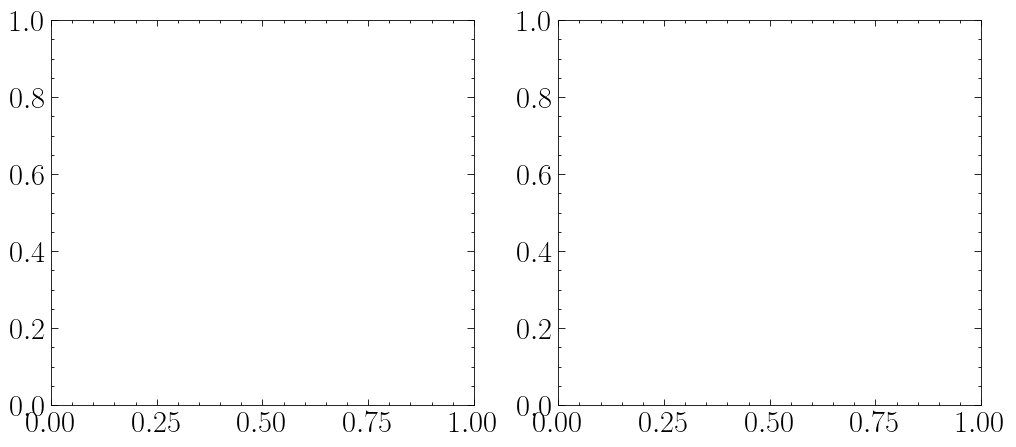

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(20, 35, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_A', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))

OFE_history_long=ofe_history[1:]
time_OFE_history_long=[time for time in time_history[1:]]

axs.plot( [time for time in time_history[1:]], (ofe_history[1:]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation steps')

ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure2B', dpi=600, bbox_inches='tight')


grid = np.linspace(-3, 3, 200); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.figure(figsize=(5,4)); 
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.xlabel("x"); plt.ylabel("y"); 
plt.title("Analytical Invernizzi Potential"); 
plt.colorbar()
plt.show()


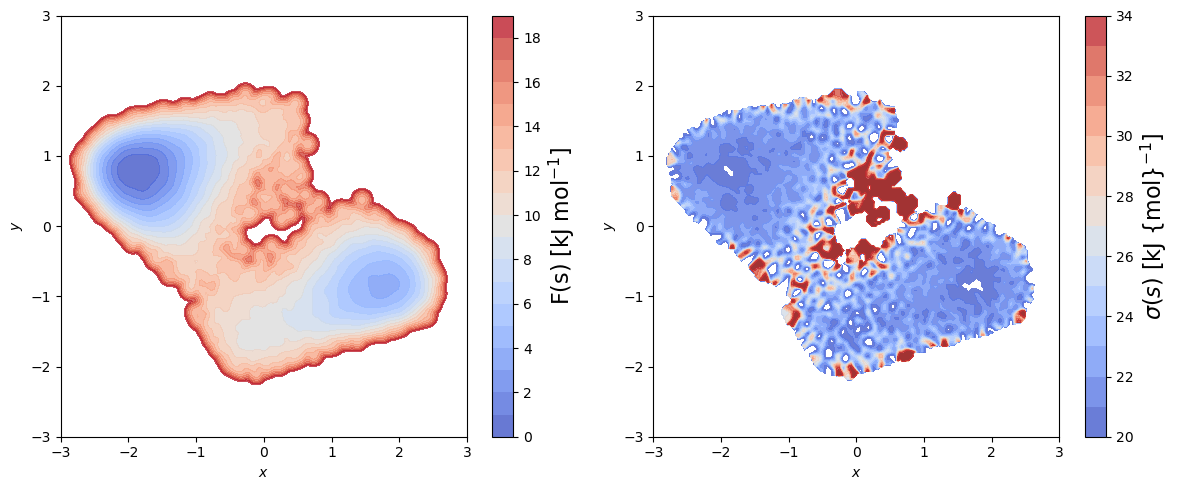

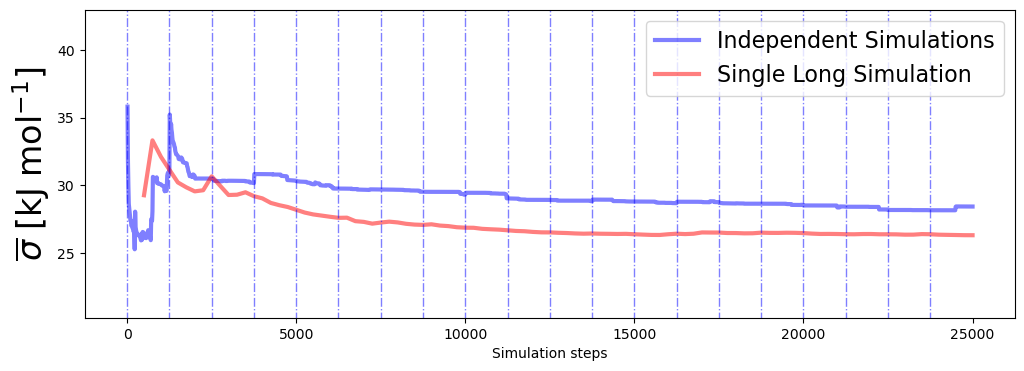

In [169]:
os.chdir(path + "/DATA_examples/Invernizzi_2D_potential_more_data")

#make "sim_start" list with only the first entry of a simulation
sim_start = [ofe_history_patch_time[i] for i in range(n_simulations)]
sim_start_error = [ofe_history_patch[i] for i in range(n_simulations)]

# Plot Results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(Xp, Yp, FES_patch, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe_patch*cutoff, levels=[35,200], cmap=colors.ListedColormap(['darkred']), antialiased=False, alpha=0.8);
cp = axs[1].contourf(X, Y, ofe_patch*cutoff, levels=np.arange(20, 35, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_C', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in ofe_history_patch_time], (ofe_history_patch),color='blue',alpha=0.5,linewidth=3,label="Independent Simulations");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')
axs.tick_params(axis ='y', labelcolor = 'black')

axs.plot( time_OFE_history_long, OFE_history_long ,color='red',alpha=0.5,linewidth=3,label="Single Long Simulation");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')

axs.set_xlabel('Simulation steps')

for i in np.arange(0,n_simulations):
    axs.plot([i*1250,i*1250],[20,50],'-.',color='blue',linewidth=1,alpha=0.5)

axs.set_ylim([min(ofe_history_patch)*0.8,max(ofe_history_patch)*1.2])

axs.legend(fontsize=16)

plt.savefig('Figure2_D', dpi=600, bbox_inches='tight')

#ax2 = axs.twinx()
#ax2.set_xlabel('Simulation steps')
#ax2.set_ylabel('Sampled Volume',color='red')
#ax2.tick_params(axis ='y', labelcolor = 'red')
#ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6/200,2)),color='red',alpha=0.5,linewidth=3);


### NEW : instead of patching 20 normal simulations, only take 17 normal simulations and 3 HP simulations, focusing on the unexplored region in the centre